In [1]:
import numpy 
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#from wquantiles import quantile
from openfisca_survey_manager.utils import asof

#from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
#from openfisca_france_indirect_taxation.surveys import SurveyScenario
#from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
#from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

from openfisca_france_indirect_taxation.examples.utils_example import df_weighted_average_grouped
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax import carbon_tax_rv
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities)
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Graph_utils import (
    graph_CO2_emissions,
    graph_delta_CO2,
    graph_share_co2_emissions,
    graph_share_emissions_reduction,
    graph_ratio_emissions_reduction,
    graph_winners_losers,
    graph_net_transfers,
    graph_net_transfers_uc,
    graph_effort_rate,
    quantiles_for_boxplot,
    boxplot_effort_rate,
    boxplot_net_transfers,
    boxplot_net_transfers_uc
    )

In [2]:
data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
output_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Output"
sns.set_style("whitegrid")

In [3]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
elasticites_douenne = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
to_graph, menages_reform, df_sum = run_all_elasticities(data_elasticities= df_elasticities, 
                                                        year = 2019, 
                                                        reform = carbon_tax_rv,
                                                        bonus_cheques_uc=True)
#menages_reform.to_csv(os.path.join(output_path,'Data/menages_reform.csv'))
#to_graph.to_csv(os.path.join(output_path,'Data/to_graph.csv'))
#df_sum.to_csv(os.path.join(output_path,'Data/df_sum.csv'))

In [4]:
menages_reform = pd.read_csv(os.path.join(output_path,'Data/menages_reform.csv'), index_col = 0)
to_graph = pd.read_csv(os.path.join(output_path,'Data/to_graph.csv'), index_col = 0)
df_sum = pd.read_csv(os.path.join(output_path,'Data/df_sum.csv'), index_col = 0)

In [6]:
menages_reform

rev_disponible  emissions_CO2_carburants_carbon_tax_rv  \
0.0        50823.539062                             5316.644043   
1.0        23046.730469                             3047.617432   
2.0        50842.218750                             2047.165771   
3.0        35482.238281                             1603.742065   
4.0        61247.660156                             4897.770508   
...                 ...                                     ...   
12077.0    55800.566406                                0.000000   
12078.0    62176.507812                                0.000000   
12079.0    19437.675781                                0.000000   
12080.0    33660.191406                                0.000000   
1.0         5321.832668                             1271.405774   

         ticpe_totale_carbon_tax_rv  emissions_CO2_carburants    ocde10  \
0.0                     1351.790283               5432.791016  1.500000   
1.0                      774.876099               3114.195557  1.000000   
2.0                      520.504822               2091.887939  2.600000   
3.0                      412.777191               1637.869019  1.500000   
4.0                     1245.289062               5004.766602  2.000000   
...                             ...                       ...       ...   
12077.0                    0.000000                  0.000000  1.500000   
12078.0                    0.000000                  0.000000  1.500000   
12079.0                    0.000000                  0.000000  1.000000   
12080.0                    0.000000                  0.000000  1.500000   
1.0                      340.220632               1357.332043  1.135331   

                    ref_elasticity  \
0.0            Combet et al (2009)   
1.0            Combet et al (2009)   
2.0            Combet et al (2009)   
3.0            Combet et al (2009)   
4.0            Combet et al (2009)   
...                            ...   
12077.0  Rivers & Schaufele (2015)   
12078.0  Rivers & Schaufele (2015)   
12079.0  Rivers & Schaufele (2015)   
12080.0  Rivers & Schaufele (2015)   
1.0      Rivers & Schaufele (2015)   

         depenses_carburants_corrigees_carbon_tax_rv  ticpe_totale  \
0.0                                      3018.546387   1271.416870   
1.0                                      1730.297363    728.804199   
2.0                                      1162.286743    489.557159   
3.0                                       916.402832    389.166260   
4.0                                      2780.729248   1171.247925   
...                                              ...           ...   
12077.0                                     0.000000      0.000000   
12078.0                                     0.000000      0.000000   
12079.0                                     0.000000      0.000000   
12080.0                                     0.000000      0.000000   
1.0                                       741.697943    337.912817   

         bonus_cheques_energie_uc  contributions_reforme  \
0.0                     31.036646              80.373413   
1.0                     20.691097              46.071899   
2.0                     53.796852              30.947662   
3.0                     31.036646              23.610931   
4.0                     41.382195              74.041138   
...                           ...                    ...   
12077.0                  3.796148               0.000000   
12078.0                  3.796148               0.000000   
12079.0                  2.530765               0.000000   
12080.0                  3.796148               0.000000   
1.0                      2.873256               2.307815   

         bonus_cheques_energie_menage niveau_vie_decile  depenses_carburants  \
0.0                         31.698721                 7          2952.603760   
1.0                         31.698721                 3          1692.497559   
2.0                         31.698721       

## Distributive effects
### Vertical effects

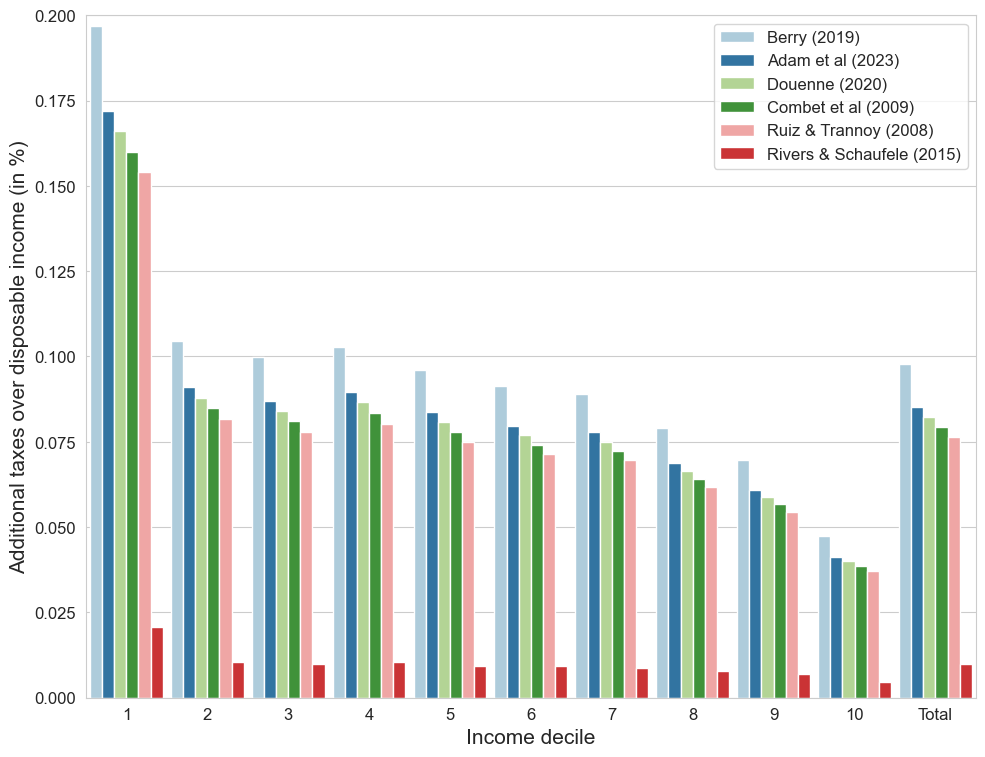

In [5]:
graph_effort_rate(to_graph,carbon_tax_rv,elas_ext = False,elas_vect = False,bonus_cheques_uc=True)

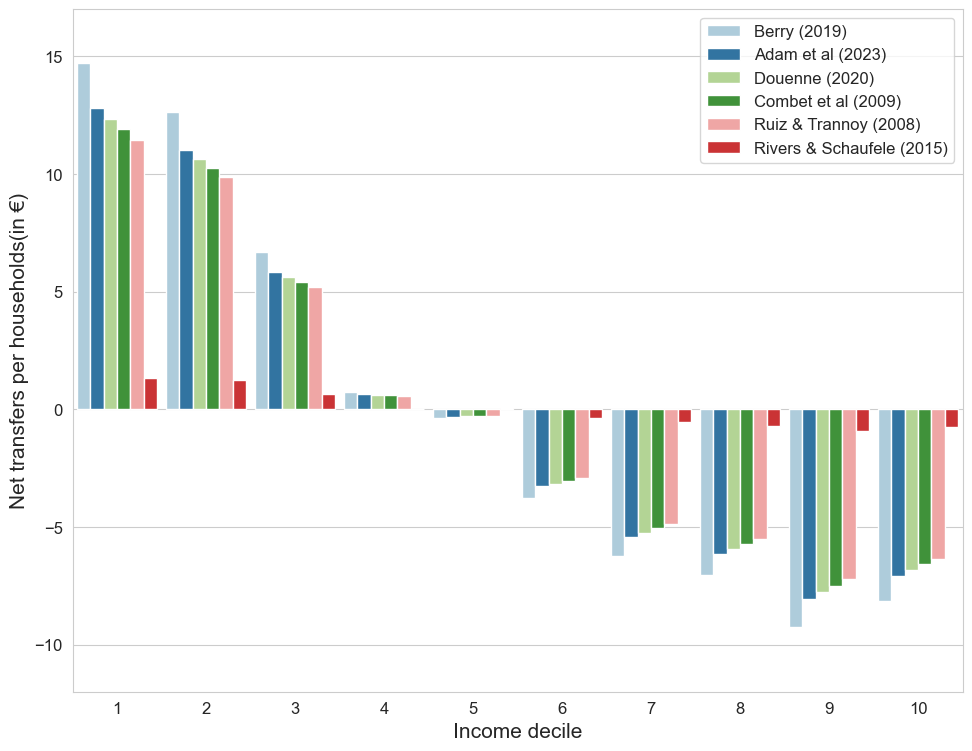

In [6]:
graph_net_transfers(to_graph,carbon_tax_rv,elas_ext=False,elas_vect = False,bonus_cheques_uc=True)

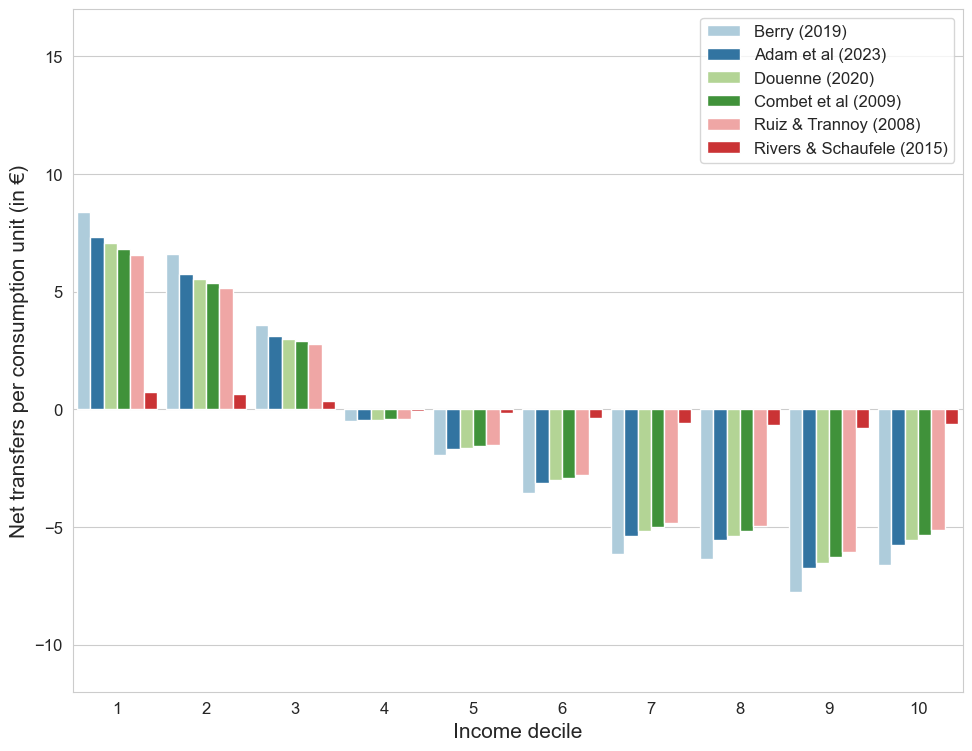

In [7]:
graph_net_transfers_uc(to_graph,carbon_tax_rv,elas_ext=False,elas_vect = False,bonus_cheques_uc=True)

### Horizontal effects

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:393: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot, x='plot_decile', y='Effort_rate', hue = 'ref_elasticity',


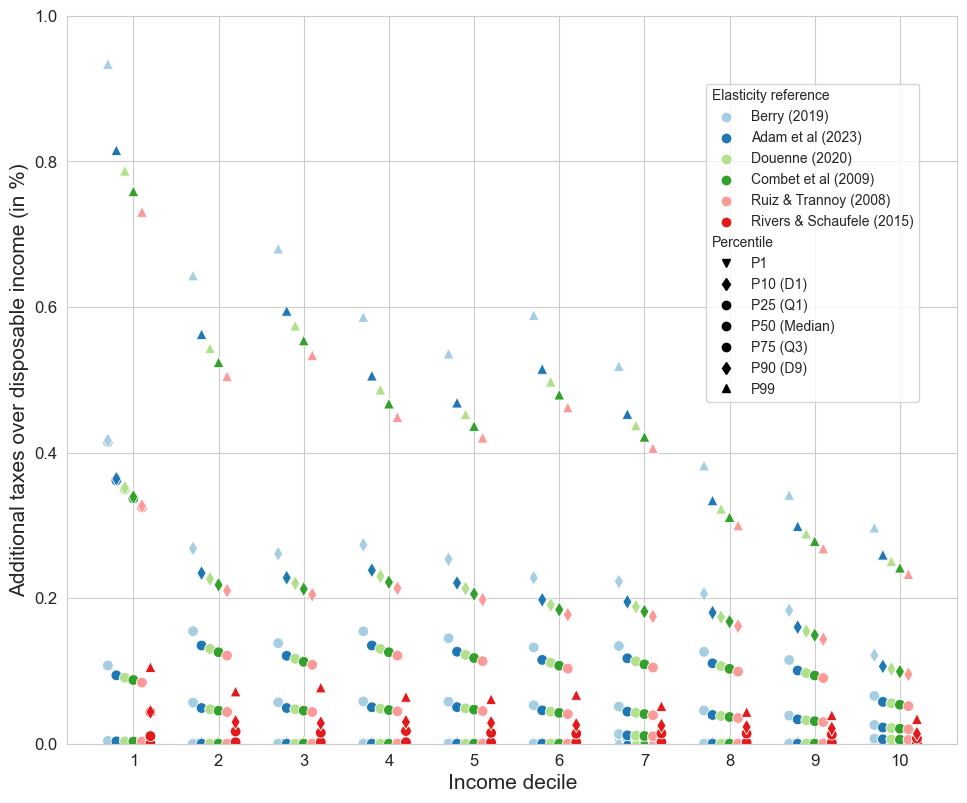

In [8]:
boxplot_effort_rate(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

In [9]:
hue_order = ['Berry (2019)', 'Adam et al (2023)', 'Douenne (2020)', 'Combet et al (2009)', 'Ruiz & Trannoy (2008)','Rivers & Schaufele (2015)']
quantile_effort_rate = quantiles_for_boxplot(menages_reform,'Effort_rate',hue_order)
quantile_effort_rate[quantile_effort_rate['niveau_vie_decile'] == 2]

niveau_vie_decile             ref_elasticity  Effort_rate  plot_decile  \
0                2.0               Berry (2019)     0.000000          1.7   
0                2.0               Berry (2019)     0.000000          1.7   
0                2.0               Berry (2019)     0.000000          1.7   
0                2.0               Berry (2019)     0.056423          1.7   
0                2.0               Berry (2019)     0.154583          1.7   
0                2.0               Berry (2019)     0.268119          1.7   
0                2.0               Berry (2019)     0.643277          1.7   
0                2.0          Adam et al (2023)     0.000000          1.8   
0                2.0          Adam et al (2023)     0.000000          1.8   
0                2.0          Adam et al (2023)     0.000000          1.8   
0                2.0          Adam et al (2023)     0.049049          1.8   
0                2.0          Adam et al (2023)     0.134901          1.8   
0                2.0          Adam et al (2023)     0.234326          1.8   
0                2.0          Adam et al (2023)     0.562427          1.8   
0                2.0             Douenne (2020)     0.000000          1.9   
0                2.0             Douenne (2020)     0.000000          1.9   
0                2.0             Douenne (2020)     0.000000          1.9   
0                2.0             Douenne (2020)     0.047254          1.9   
0                2.0             Douenne (2020)     0.130284          1.9   
0                2.0             Douenne (2020)     0.226288          1.9   
0                2.0             Douenne (2020)     0.543175          1.9   
0                2.0        Combet et al (2009)     0.000000          2.0   
0                2.0        Combet et al (2009)     0.000000          2.0   
0                2.0        Combet et al (2009)     0.000000          2.0   
0                2.0        Combet et al (2009)     0.045391          2.0   
0                2.0        Combet et al (2009)     0.125666          2.0   
0                2.0        Combet et al (2009)     0.218250          2.0   
0                2.0        Combet et al (2009)     0.523926          2.0   
0                2.0      Ruiz & Trannoy (2008)     0.000000          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.000000          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.000000          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.043520          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.121049          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.210212          2.1   
0                2.0      Ruiz & Trannoy (2008)     0.504675          2.1   
0                2.0  Rivers & Schaufele (2015)     0.000000          2.2   
0                2.0  Rivers & Schaufele (2015)     0.000000          2.2   
0                2.0  Rivers & Schaufele (2015)     0.000000          2.2   
0                2.0  Rivers & Schaufele (2015)     0.002141          2.2   
0                2.0  Rivers & Schaufele (2015)     0.016866          2.2   
0                2.0  Rivers & Schaufele (2015)     0.029793          2.2   
0                2.0  Rivers & Schaufele (2015)     0.071724          2.2   

   quantile    Percentile  
0      0.01            P1  
0      0.10      P10 (D1)  
0      0.25      P25 (Q1)  
0      0.50  P50 (Median)  
0      0.75      P75 (Q3)  
0      0.90      P90 (D9)  
0      0.99           P99  
0      0.01            P1  
0      0.10      P10 (D1)  
0      0.25      P25 (Q1)  
0      0.50  P50 (Median)  
0      0.75      P75 (Q3)  
0      0.90      P90 (D9)  
0      0.99           P99  
0      0.01            P1  
0      0.10      P10 (D1)  
0      0.25      P25 (Q1)  
0      0.50  P50 (Median)  
0      0.75      P75 (Q3)  
0      0.90      P90 (D9)  
0      0.99           P99  
0      0.01            P1  
0      0.10      P10 (D1)  
0      0.25      P2

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:300: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot , x='plot_decile', y='Net_transfers_reform', hue = 'ref_elasticity',


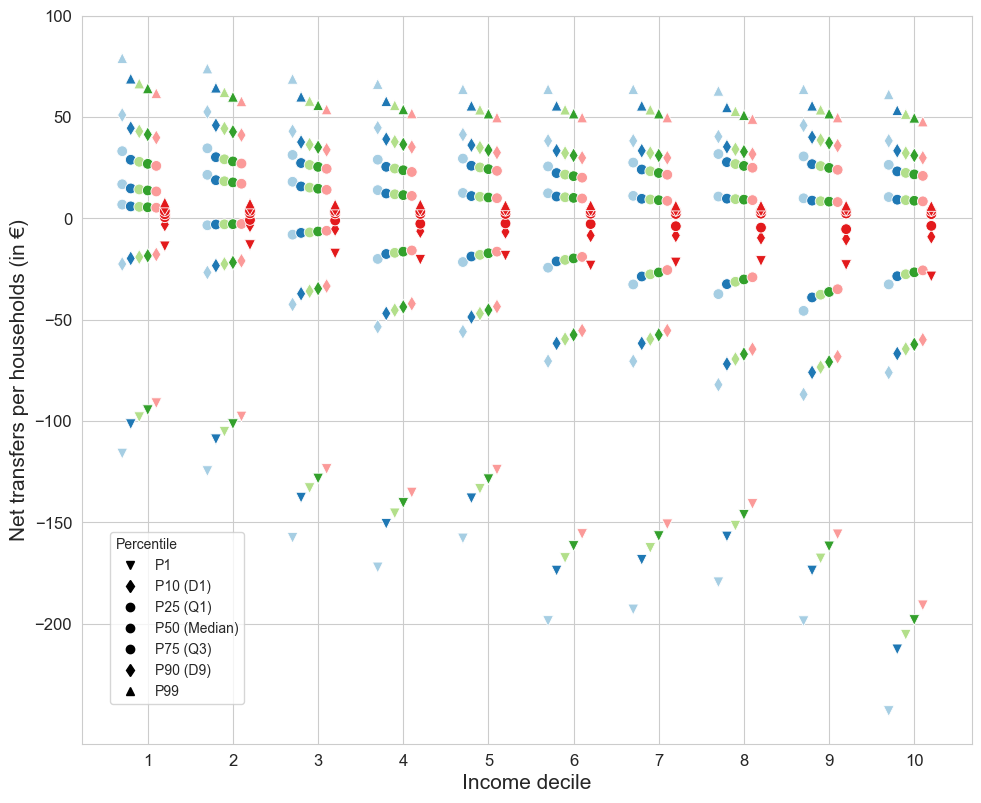

In [10]:
boxplot_net_transfers(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

c:\users\veve1\onedrive\documents\ensae 3a\memoire mie\openfisca-france-indirect-taxation\openfisca_france_indirect_taxation\projects\Master_Thesis_Herve\Graph_utils.py:345: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.scatterplot(data = quantiles_to_plot , x='plot_decile', y='Net_transfers_reform_uc', hue = 'ref_elasticity',


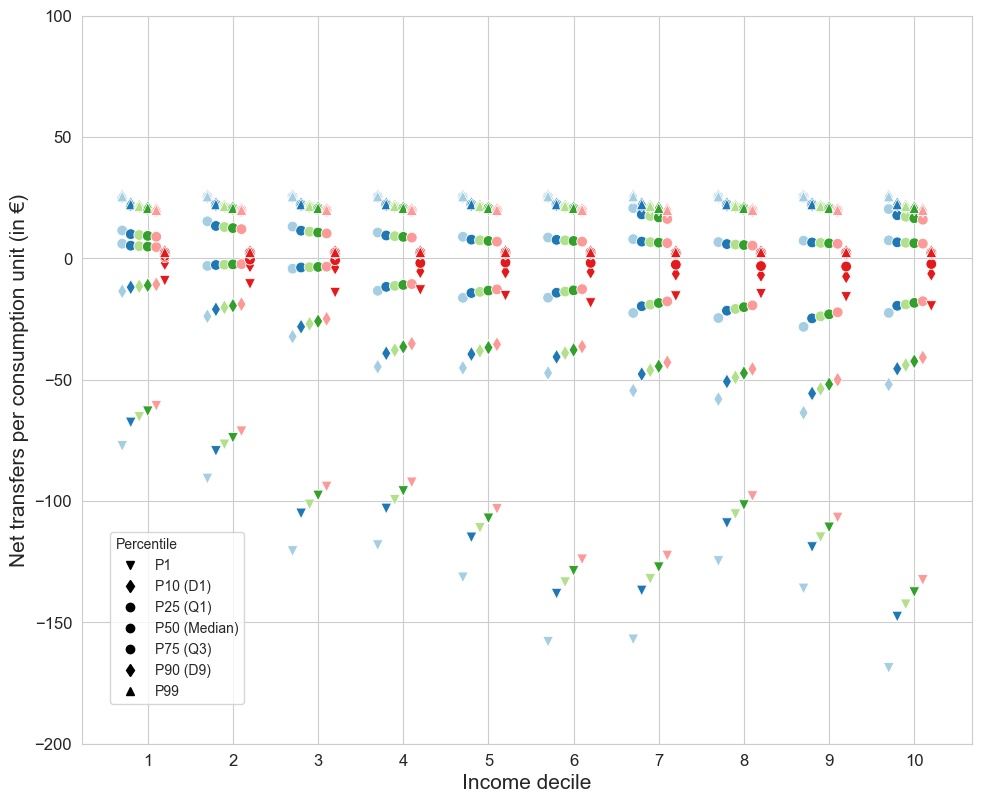

In [11]:
boxplot_net_transfers_uc(menages_reform,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=True)

In [12]:
quantile_net_transfers = quantiles_for_boxplot(menages_reform,'Net_transfers_reform',hue_order)
quantile_net_transfers[quantile_net_transfers['niveau_vie_decile']== 10]

niveau_vie_decile             ref_elasticity  Net_transfers_reform  \
0               10.0               Berry (2019)           -243.132433   
0               10.0               Berry (2019)            -76.108418   
0               10.0               Berry (2019)            -32.585371   
0               10.0               Berry (2019)             10.527560   
0               10.0               Berry (2019)             26.428385   
0               10.0               Berry (2019)             38.254238   
0               10.0               Berry (2019)             61.206783   
0               10.0          Adam et al (2023)           -212.703057   
0               10.0          Adam et al (2023)            -66.709069   
0               10.0          Adam et al (2023)            -28.544027   
0               10.0          Adam et al (2023)              9.217003   
0               10.0          Adam et al (2023)             23.182819   
0               10.0          Adam et al (2023)             33.364899   
0               10.0          Adam et al (2023)             53.383839   
0               10.0             Douenne (2020)           -205.458014   
0               10.0             Douenne (2020)            -64.437521   
0               10.0             Douenne (2020)            -27.581821   
0               10.0             Douenne (2020)              8.998286   
0               10.0             Douenne (2020)             22.441704   
0               10.0             Douenne (2020)             32.200783   
0               10.0             Douenne (2020)             51.521259   
0               10.0        Combet et al (2009)           -198.212996   
0               10.0        Combet et al (2009)            -62.165989   
0               10.0        Combet et al (2009)            -26.619572   
0               10.0        Combet et al (2009)              8.690216   
0               10.0        Combet et al (2009)             21.700493   
0               10.0        Combet et al (2009)             31.036646   
0               10.0        Combet et al (2009)             49.658634   
0               10.0      Ruiz & Trannoy (2008)           -190.968430   
0               10.0      Ruiz & Trannoy (2008)            -59.894348   
0               10.0      Ruiz & Trannoy (2008)            -25.657322   
0               10.0      Ruiz & Trannoy (2008)              8.394164   
0               10.0      Ruiz & Trannoy (2008)             20.959282   
0               10.0      Ruiz & Trannoy (2008)             29.872507   
0               10.0      Ruiz & Trannoy (2008)             47.796013   
0               10.0  Rivers & Schaufele (2015)            -28.680811   
0               10.0  Rivers & Schaufele (2015)             -9.088055   
0               10.0  Rivers & Schaufele (2015)             -3.704093   
0               10.0  Rivers & Schaufele (2015)              2.074056   
0               10.0  Rivers & Schaufele (2015)              3.702214   
0               10.0  Rivers & Schaufele (2015)              4.555377   
0               10.0  Rivers & Schaufele (2015)              6.139002   

   plot_decile  quantile    Percentile  
0          9.7      0.01            P1  
0          9.7      0.10      P10 (D1)  
0          9.7      0.25      P25 (Q1)  
0          9.7      0.50  P50 (Median)  
0          9.7      0.75      P75 (Q3)  
0          9.7      0.90      P90 (D9)  
0          9.7      0.99           P99  
0          9.8      0.01            P1  
0          9.8      0.10      P10 (D1)  
0          9.8      0.25      P25 (Q1)  
0          9.8      0.50  P50 (Median)  
0          9.8      0.75      P75 (Q3)  
0          9.8      0.90      P90 (D9)  
0          9.8      0.99           P99  
0          9.9      0.01            P1  
0          9.9      0.10      P10 (D1)  
0          9.9      0.25      P25 (Q1)  
0          9.9      0.50  P50 (Median)  
0          9.9      0.75      P75 (Q3)  
0          9.9      0.90      P90 (D9)  
0 

### Implications for political support

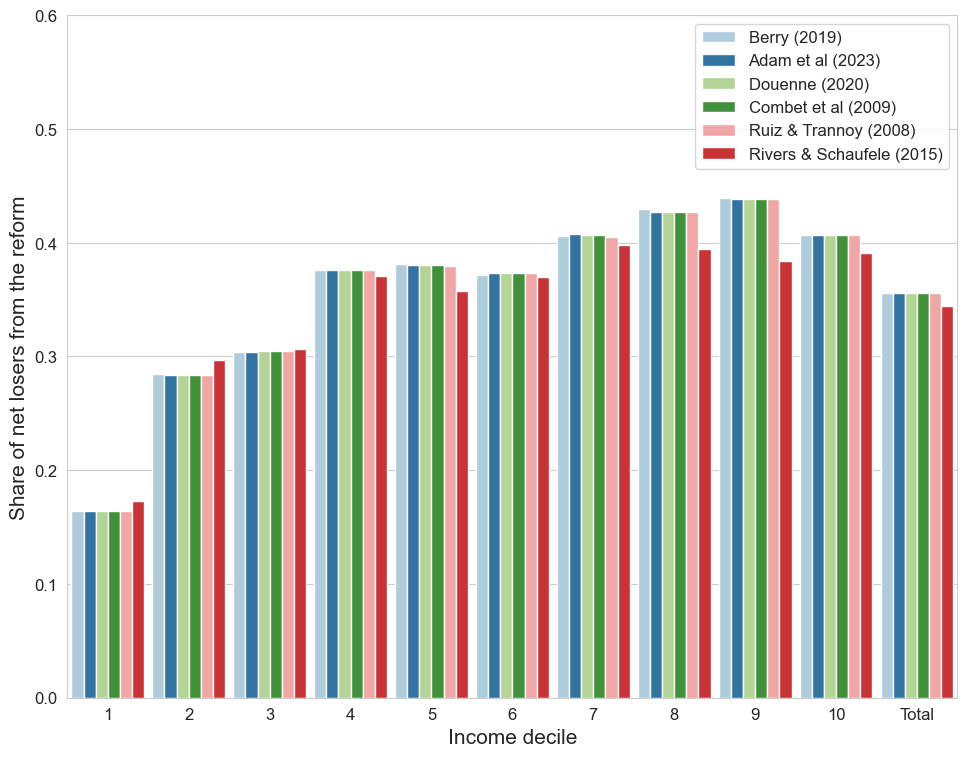

In [13]:
graph_winners_losers(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

## Environmental effects

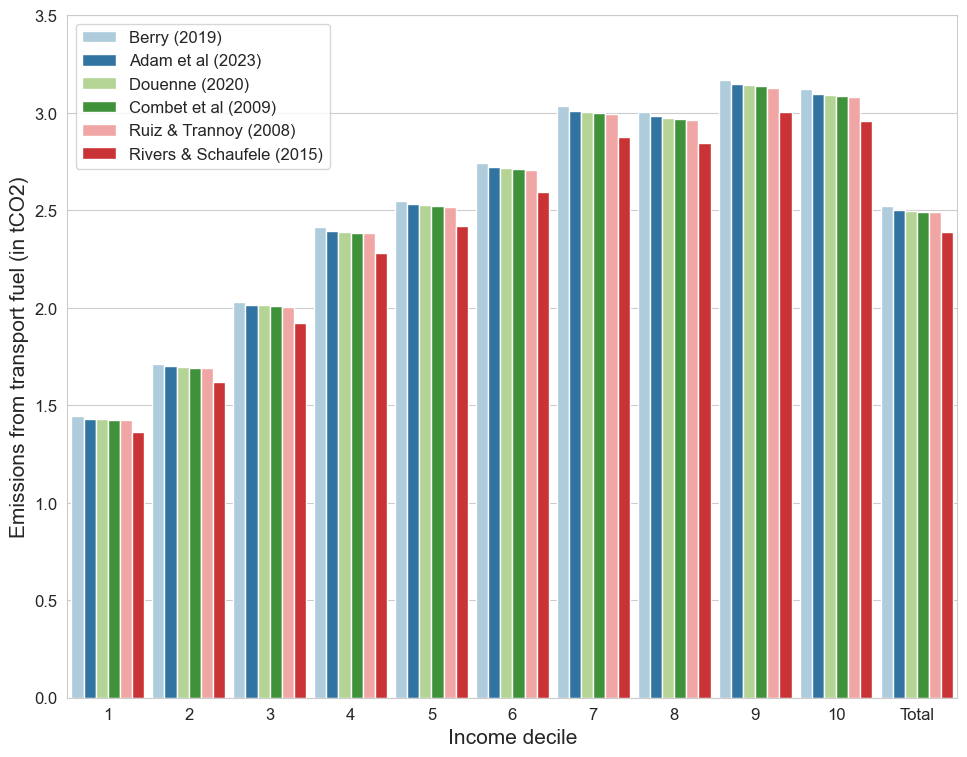

In [14]:
graph_CO2_emissions(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

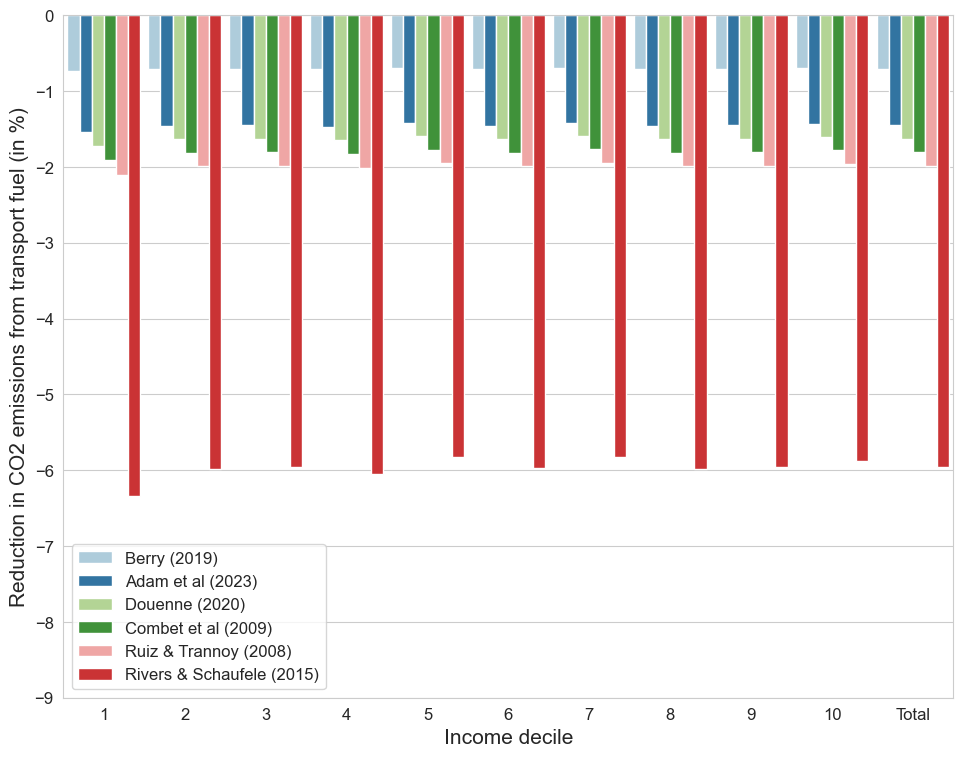

In [15]:
graph_delta_CO2(to_graph,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

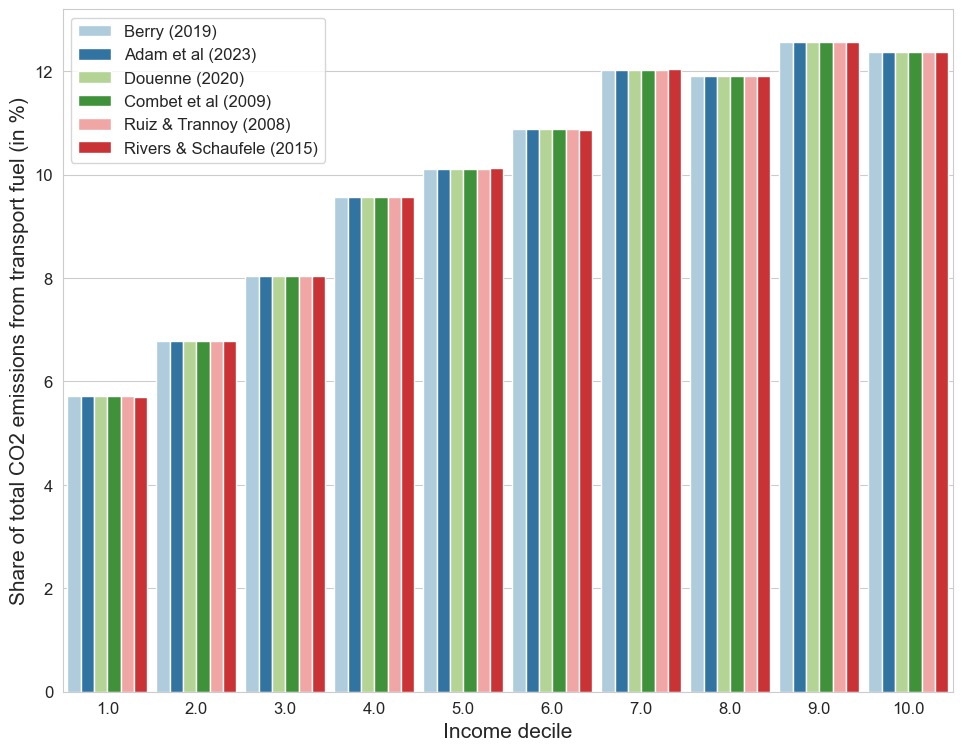

In [16]:
graph_share_co2_emissions(df_sum,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

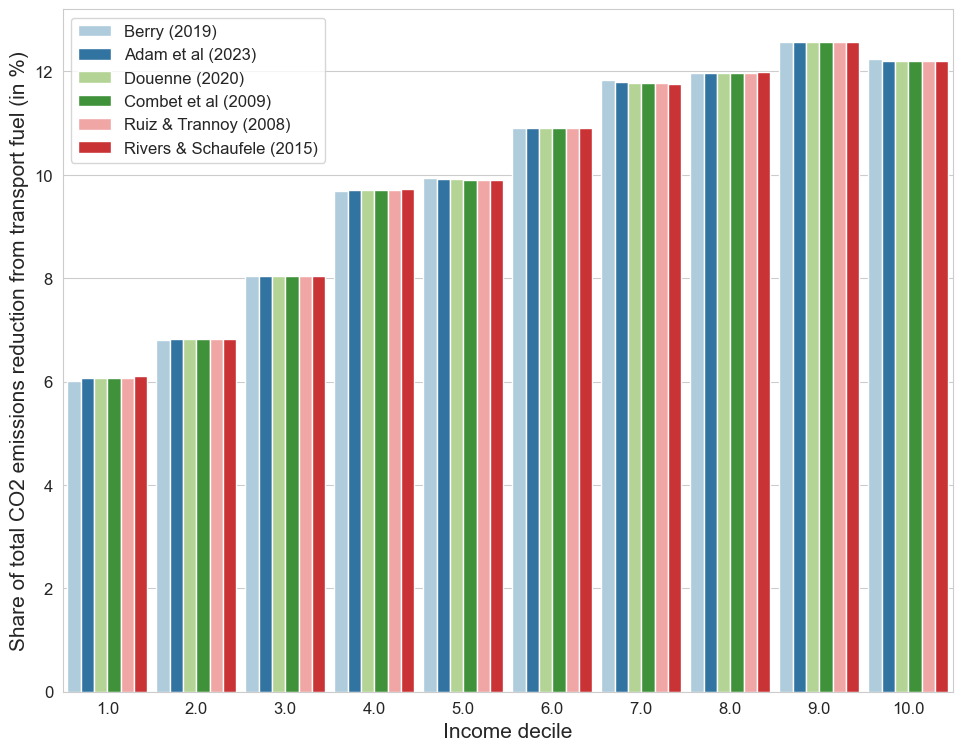

In [17]:
graph_share_emissions_reduction(df_sum,carbon_tax_rv,elas_ext=False,elas_vect= False,bonus_cheques_uc=True)

### With bonus_cheques_energie by households

In [18]:
to_graph_menage, menages_reform_menage, df_sum_menage = run_all_elasticities(data_elasticities = df_elasticities, year = 2019, reform = carbon_tax_rv, bonus_cheques_uc= False)

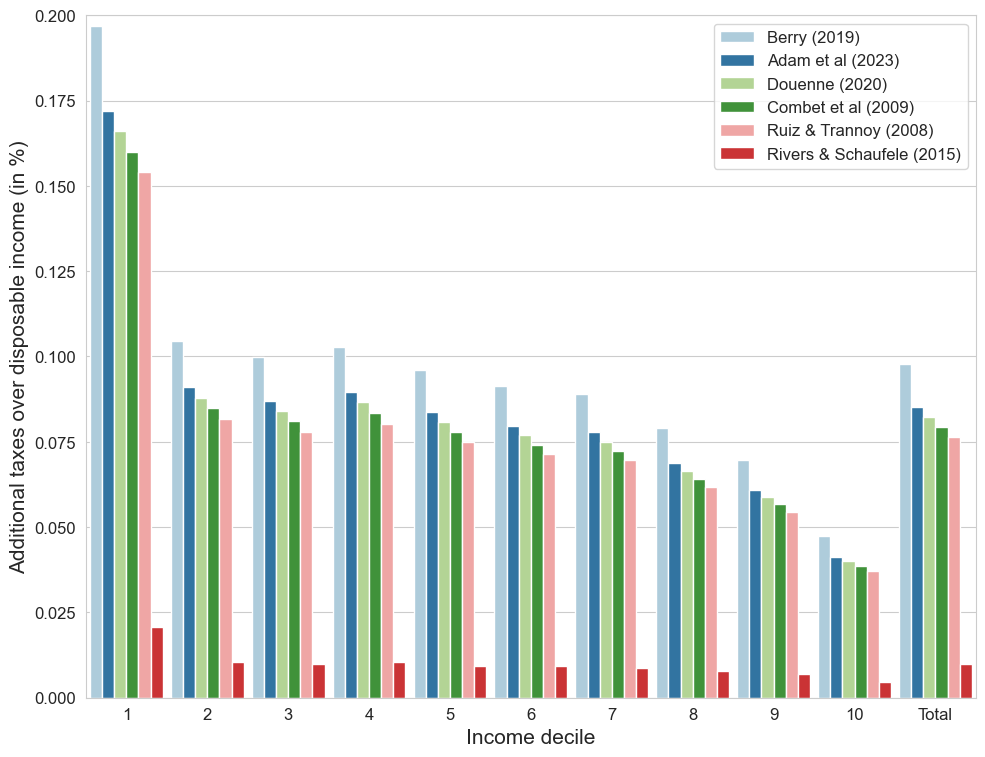

In [19]:
graph_effort_rate(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

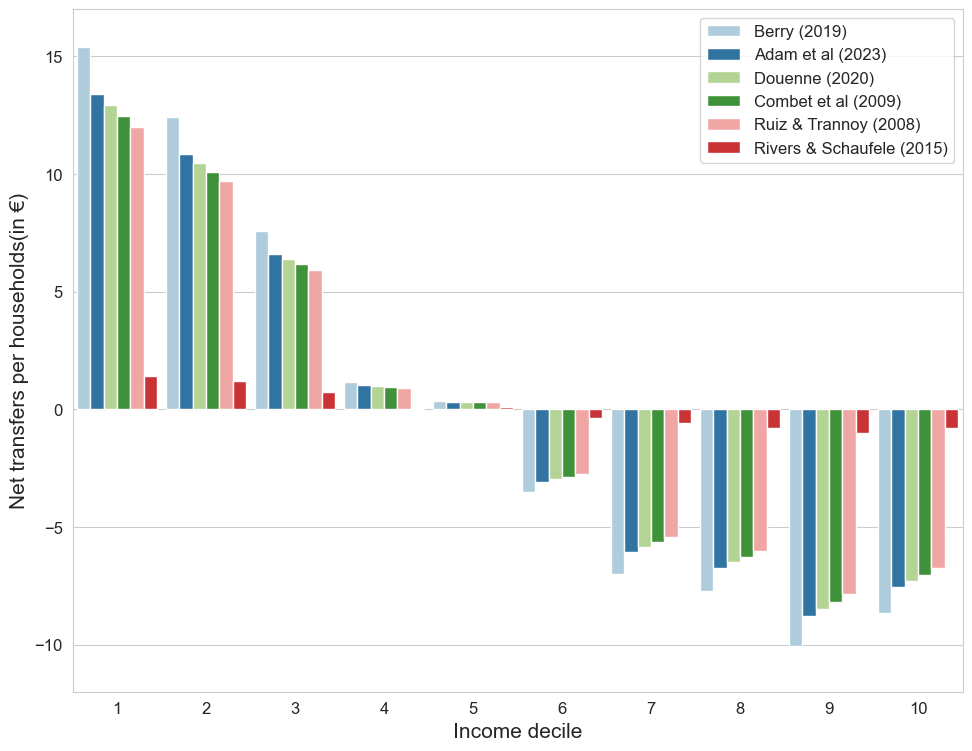

In [20]:
graph_net_transfers(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

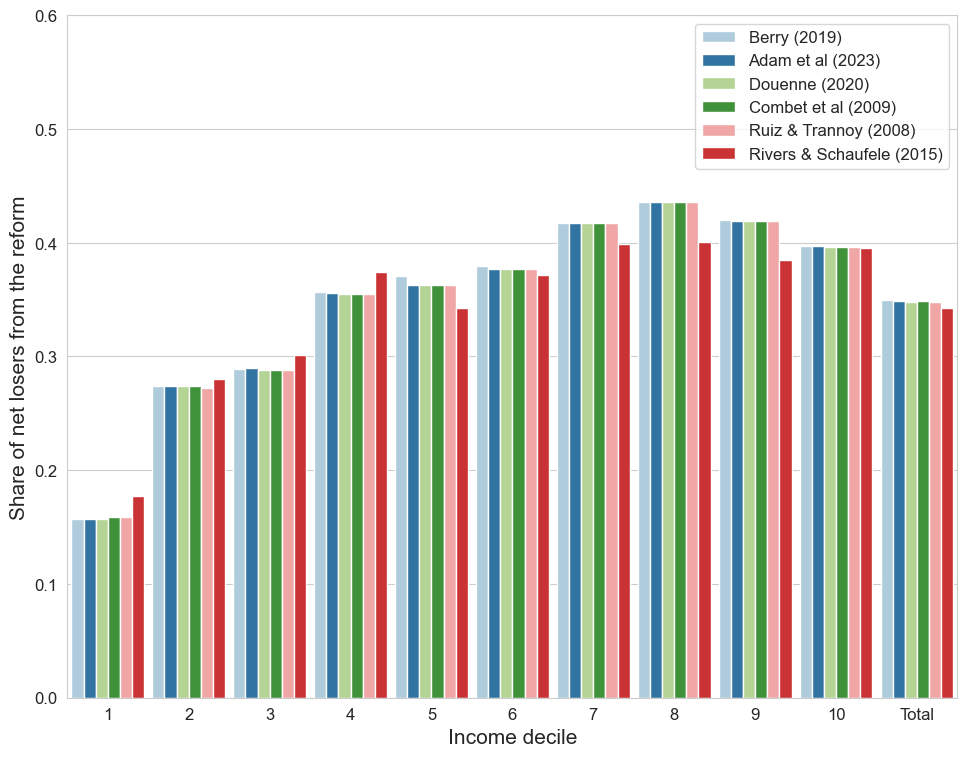

In [21]:
graph_winners_losers(to_graph_menage,carbon_tax_rv,elas_ext=False,elas_vect=False,bonus_cheques_uc=False)

## A creuser !

In [22]:
menages_reform

emissions_CO2_carburants  \
0.0                   5432.791016   
1.0                   3114.195557   
2.0                   2091.887939   
3.0                   1637.869019   
4.0                   5004.766602   
...                           ...   
12077.0                  0.000000   
12078.0                  0.000000   
12079.0                  0.000000   
12080.0                  0.000000   
1.0                   1357.332043   

         depenses_carburants_corrigees_carbon_tax_rv    ocde10  ticpe_totale  \
0.0                                      3018.546387  1.500000   1271.416870   
1.0                                      1730.297363  1.000000    728.804199   
2.0                                      1162.286743  2.600000    489.557159   
3.0                                       916.402832  1.500000    389.166260   
4.0                                      2780.729248  2.000000   1171.247925   
...                                              ...       ...           ...   
12077.0                                     0.000000  1.500000      0.000000   
12078.0                                     0.000000  1.500000      0.000000   
12079.0                                     0.000000  1.000000      0.000000   
12080.0                                     0.000000  1.500000      0.000000   
1.0                                       741.697943  1.135331    337.912817   

         ticpe_totale_carbon_tax_rv  bonus_cheques_energie_uc  \
0.0                     1351.790283                 31.036646   
1.0                      774.876099                 20.691097   
2.0                      520.504822                 53.796852   
3.0                      412.777191                 31.036646   
4.0                     1245.289062                 41.382195   
...                             ...                       ...   
12077.0                    0.000000                  3.796148   
12078.0                    0.000000                  3.796148   
12079.0                    0.000000                  2.530765   
12080.0                    0.000000                  3.796148   
1.0                      340.220632                  2.873256   

         depenses_carburants  pondmen  rev_disponible  niveau_vie_decile  \
0.0              2952.603760     1443    50823.539062                  7   
1.0              1692.497559     2407    23046.730469                  3   
2.0              1136.895630      968    50842.218750                  2   
3.0               897.023682     2076    35482.238281                  3   
4.0              2719.981934     1364    61247.660156                  6   
...                      ...      ...             ...                ...   
12077.0             0.000000     1743    55800.566406                  7   
12078.0             0.000000     1571    62176.507812                  8   
12079.0             0.000000     1087    19437.675781                  2   
12080.0             0.000000     1407    33660.191406                  3   
1.0               761.453407   685491     5321.832668                  1   

         emissions_CO2_carburants_carbon_tax_rv  bonus_cheques_energie_menage  \
0.0                                 5316.644043                     31.698721   
1.0                                 3047.617432                     31.698721   
2.0                                 2047.165771                     31.698721   
3.0                                 1603.742065                     31.698721   
4.0                                 4897.770508                     31.698721   
...                                         ...                           ...   
12077.0                                0.000000                      3.877127   
12078.0                                0.000000                      3.877127   
12079.0                                0.000000                      3.877127   
12080.0                                0.000000                      3.877127   
1.0               

In [23]:
menages_reform_menage

ticpe_totale_carbon_tax_rv  emissions_CO2_carburants_carbon_tax_rv  \
0.0                     1351.790283                             5316.644043   
1.0                      774.876099                             3047.617432   
2.0                      520.504822                             2047.165771   
3.0                      412.777191                             1603.742065   
4.0                     1245.289062                             4897.770508   
...                             ...                                     ...   
12077.0                    0.000000                                0.000000   
12078.0                    0.000000                                0.000000   
12079.0                    0.000000                                0.000000   
12080.0                    0.000000                                0.000000   
1.0                      340.220632                             1271.405774   

         depenses_carburants_corrigees_carbon_tax_rv  depenses_carburants  \
0.0                                      3018.546387          2952.603760   
1.0                                      1730.297363          1692.497559   
2.0                                      1162.286743          1136.895630   
3.0                                       916.402832           897.023682   
4.0                                      2780.729248          2719.981934   
...                                              ...                  ...   
12077.0                                     0.000000             0.000000   
12078.0                                     0.000000             0.000000   
12079.0                                     0.000000             0.000000   
12080.0                                     0.000000             0.000000   
1.0                                       741.697943           761.453407   

         rev_disponible niveau_vie_decile  contributions_reforme  \
0.0        50823.539062                 7              80.373413   
1.0        23046.730469                 3              46.071899   
2.0        50842.218750                 2              30.947662   
3.0        35482.238281                 3              23.610931   
4.0        61247.660156                 6              74.041138   
...                 ...               ...                    ...   
12077.0    55800.566406                 7               0.000000   
12078.0    62176.507812                 8               0.000000   
12079.0    19437.675781                 2               0.000000   
12080.0    33660.191406                 3               0.000000   
1.0         5321.832668                 1               2.307815   

         ticpe_totale  bonus_cheques_energie_menage  bonus_cheques_energie_uc  \
0.0       1271.416870                     31.698721                 31.036646   
1.0        728.804199                     31.698721                 20.691097   
2.0        489.557159                     31.698721                 53.796852   
3.0        389.166260                     31.698721                 31.036646   
4.0       1171.247925                     31.698721                 41.382195   
...               ...                           ...                       ...   
12077.0      0.000000                      3.877127                  3.796148   
12078.0      0.000000                      3.877127                  3.796148   
12079.0      0.000000                      3.877127                  2.530765   
12080.0      0.000000                      3.877127                  3.796148   
1.0        337.912817                      3.877127                  2.873256   

                    ref_elasticity    ocde10 pondmen  \
0.0            Combet et al (2009)  1.500000    1443   
1.0            Combet et al (2009)  1.000000    2407   
2.0            Combet et al (2009)  2.600000     968   
3.0            Combet et al (2009)  1.500000    2076   
4.0            Combet et al (2009)  2.000000    1364   
...      

In [24]:
boxplot_net_transfers(menages_reform_menage, carbon_tax_rv, elas_vect=False, bonus_cheques_uc=False)

TypeError: boxplot_net_transfers() missing 1 required positional argument: 'elas_ext'

In [ ]:
boxplot_effort_rate(menages_reform_menage, carbon_tax_rv, elas_vect=False, bonus_cheques_uc=False)